## Confidence Intervals

In this section you will learn more about **Confidence Intervals** taught to you thus far in the course. 

## Table of Contents
  
- [1. Introduction](#Intro)  
- [2. Import Libraries](#Import)
- [3. Create Dataset Sample](#data)
- [4. Confidence Interval](#Conf-Int)
- [5. Histograms and Curves](#Hists)
- [6. Standard Deviation](#St-dev)
    - [6.1. 68 95 99 Rule](#rule)
- [7. Visualizing Confidence Intervals](#Visual-Conf)
- [8. Medical Scenario](#med)

<a name = "Intro"></a>
## Introduction

In the medical field, sometimes it is impractical to collect data from an entire population. Sometimes it can be dangerous, especially in a time like the COVID-19 pandemic in the year 2020. In these particular cases, we can use **Confidence Intervals** to create assumptions about the whole population. In this lab, we will generate a small set of data that will act as our sample, and we will calculate a confidence interval that can be made for a general population. We also will look at a histogram, a type of statistical plot used for grouping data, as well as a Gaussian curve and standard deviations and how that is relevant to our calculations. We will tie this altogether by visualizing a confidence interval on a graph, and what this means in the medical field, and how AI can be trained from this sample.

<a name = "Import"></a>
## Import Libraries

We'll make use of the following packages:
- `numpy` is what we'll use to manipulate our data
- `matplotlib.pyplolt` to support with producing graphs and visuals
- `scipy.stats` will be used to help calculate the confidence interval and produce a Gaussian distribution curve
- `scikit-learn` will be used to support creation of our sample data

Run the next cell to import all the necessary packages.

In [147]:
#import numpy and matplot libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t, norm
from sklearn import datasets

<a name = "data"></a>
## Create Dataset Sample

We are going to create a dataset using the make_blobs dataset. The dataset is randomly generated around a particular center with a provided number of features and samples. We will use 100 samples in our dataset with two features per sample. Normally, a medical dataset would have more than 100 pieces of data, but we are going to simulate only using a **sample**, or small, randomized selection of the total population.

In [148]:
data, target = datasets.make_blobs(n_samples=100, centers=2, n_features=2, random_state=1, cluster_std=3)
data1 = np.array(data[:,0])
data2 = np.array(data[:,1])

For simplicity's sake, we are going to split the dataset by column (one column or array per dimension), which is shown with **data1** and **data2**. This will help us in the graphical representation

<a name = "Conf-Int"></a>
## Confidence Interval

The **Confidence Interval** is defined as the range of values in which a parameter (most likely the mean) has a probablity  of being in. The confidence interval is usually between 0 and 1, and covers the range of either the entire dataset, none of the dataset, or a part of the dataset. You will visually see what a Confidence Interval looks like on a graph later in the notebook. 

Adjust the confidence interval below, varying the values between 0 and 1. What is the effect of the range of the array?

In [149]:
# Adjust the confidence interval (between 0 and 1), and notice the effects on the range of the arrays below
confidence_level = 0.95
# Run the cell and observe the matricies.
degrees_freedom = data.size - 1
sample_mean = np.mean(data)
sample_standard_error = sem(data)

confidence_interval = t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(array([-3.40071967, -3.50010009]), array([-1.57889683, -1.47951641]))

Note that even though when confidence_level = 1, you may expect "[-inf, inf]" but recieve "[-inf, -inf]". This is only because the range of values always appears negative in the upper bound, so the upper bound just appears negative instead of positive. The same appears for the lower bound being positive of the second array. 

By adjusting the confidence interval between 0 and 1, you should notice the following:
- As the confidence interval decreases towards 0, the range of values should approach one single value.
- As the confidence interval increases towards 1, the range of values should expand and approach positive and negative infinity

Why does the range behave this way as the confidence interval changes?

Recall the definition of a Confidence Interval above. We are focusing on the array of values in there is a probability that the mean is in. The confidence interval is the probablity itself. Therefore, if our confidence interval is 1, we are saying there is a 100% probability that the mean of the dataset is in between two parameters, thus the confidence interval would expand over two values that cover the all of the dataset. 

We are saying "*we are 100% confident that the mean lies in between these two values*". 

The same can be said when our confidence interval is 0, we are saying that we are not very confident at all that our mean lies in between two values, but those two values would be much more defined. 

"*With 0% confidence, the mean lies in between these two values*". 

The effect of this is that as confidence interval increases, the area that the interval covers on a graph increases, and the range of values increases as well. 

<a name = "Hists"></a>
## Histograms and Curves

**Histograms** are graphical representations of data that groups data into numerical categories. We use this style of graph for the purpose of grouping data, opposed to just plotting each individual point. The grouped sections are shown in bars, which are plotted with a given area. This area differs from each group with its height, as the width is the same from each group (defined boundaries of each group). 

Below are 3 different plots of data: one for all data points of the first feature, one for the second feature, and one plot with both features with two different colors. Experiment with the histograms by changing the value of the "bins" value in each histogram.

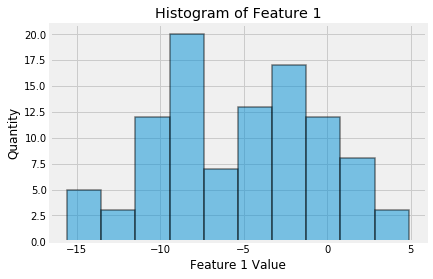

In [150]:
# Change the value of bins for any positive value, 10 is default
bins = 10

# Run the cell to see the histogram
plt.hist(data1, bins=bins, alpha=0.5, edgecolor='black', linewidth=1.5)
plt.title('Histogram of Feature 1')
plt.xlabel("Feature 1 Value")
plt.ylabel("Quantity")
plt.show()

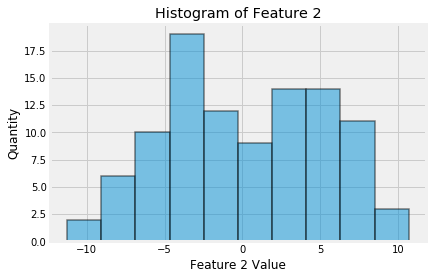

In [151]:
# Change the value of bins for any positive value, 10 is default
bins = 10

# Run the cell to see the histogram
plt.hist(data2, bins=bins, alpha=0.5, edgecolor='black', linewidth=1.5)
plt.title('Histogram of Feature 2')
plt.xlabel("Feature 2 Value")
plt.ylabel("Quantity")
plt.show()

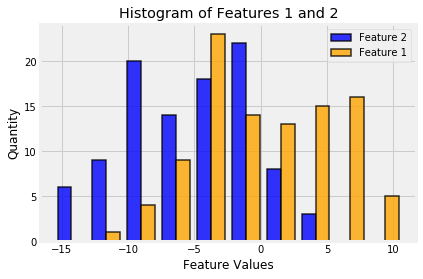

In [152]:
# Change the value of bins for any positive value, 10 is default
bins = 10

# Run the cell to see the histogram
plt.hist(data, bins=bins, color=["blue", "orange"], label={"Feature 1", "Feature 2"}, alpha = 0.8, edgecolor='black', linewidth=1.5)
plt.title('Histogram of Features 1 and 2')
plt.xlabel("Feature Values")
plt.ylabel("Quantity")
plt.legend(loc="upper right")
plt.show()

The following curves below show a **Gaussian distribution** (or normal distribution / bell curve) fitted to each histograms. This type of curve is applicable to many different scenario in statistical measures because of the shape. Oberve each Gaussian distribution below. How are each of the curves below different?

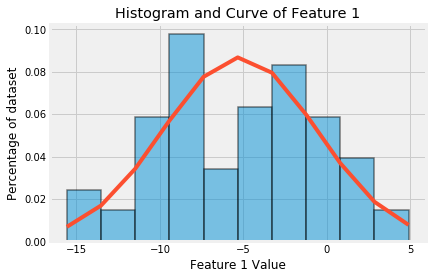

In [153]:
_, bins, _ = plt.hist(data1, 10, density=1, alpha=0.5, edgecolor='black', linewidth=1.5)
mu, sigma = norm.fit(data1)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.xlabel('Feature 1 Value')
plt.ylabel('Percentage of dataset')
plt.title('Histogram and Curve of Feature 1')
plt.plot(bins, best_fit_line)

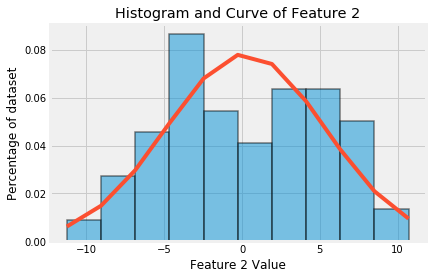

In [154]:
_, bins, _ = plt.hist(data2, 10, density=1, alpha=0.5, edgecolor='black', linewidth=1.5)
mu, sigma = norm.fit(data2)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.xlabel('Feature 2 Value')
plt.ylabel('Percentage of dataset')
plt.title('Histogram and Curve of Feature 2')
plt.plot(bins, best_fit_line)

<a name = "St-dev"></a>
## Standard Deviation

A **standard deviation** is a metric that defines the amount of difference and variance in the data. In general, low standard deviation means that the majority of the data is closely packed together, while a high standard deviation shows the data being very spread out. Standard deviations are important for knowing how much dispersion there is throughout the data, and has a direct relationship with our confidence interval.

Here is the equation for a standard deviation:

$$ \sigma =	\sqrt{\frac{\sum{(x_{i} + \mu)} ^ 2}{ N}} $$

The definitions of each variable are the following:

$$ \sigma = \text{standard deviation} $$

$$ N = \text{size of the dataset or sample} $$

$$ x_{i} = \text{each value from the dataset or sample} $$

$$ \mu = \text{mean of the dataset or sample} $$

We can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" > np.std() </a> to automatically calculate our standard deviation. 
We will insert each dimension into the np.std to calculate the standard deviation per dimension.

In [155]:
std1 = np.std(data1)
std2 = np.std(data2)

In [156]:
print("standard deviation for feature 1: " )
print(std1)

standard deviation for feature 1: 
4.596173386775957


In [157]:
print("standard deviation for feature 2: " )
print(std2)

standard deviation for feature 2: 
5.0976158255607


Based on these standard deviations we can see that both datasets are relatively spread out, and the amount of separation between groups of values is about 4.6 in the set of the first feature, and 5.1 for the set of the second feature. Despite being relatively similar, we can see that the distribution of data in the set of the second feature is slightly more *spread out* than that of the first feature.

<a name = "rule"></a>
## 68 - 95 - 99 Rule

The 68 - 95 - 99 Rule states that in a normal distribution (or bell curve), from the 1 standard deviation in the positive and negative direction from the mean contains 68% of the data in the dataset. 2 standard devaitions away contain 95% of the data, and 99% of the data is contained within 3 standard deviations. 

<img src="normal_curve.png"/>

You should see that in this particular curve and shadded region that between 95% and 99% of the data is contained within the shadded region. 

<a name = "Visual-Conf"></a>
## Visualizing the Confidence Interval

Here is a visualization for the confidence interval that was covered before. Note that the red vertical line represents the lower bound, and the orange line represents the upper bound of the confidence interval. Manipulate the confidence interval to see the effect of varying the confidence interval (between 0 and 1).

sample mean: 0.22981007647290183

standard deviation: 5.0976158255607

confidence interval range: (-9.761333348647485, 10.220953501593288)

number of deviations from mean: 1.9599639845400538

With 95.0% confidence, the population mean is this range: (-9.761333348647485, 10.220953501593288)


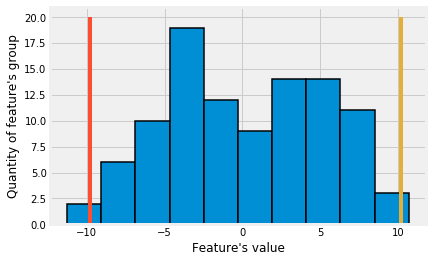

In [158]:
# Manipulate the confidence_interval between 0 and 1
confidence_interval = 0.95

# adjust the height on the lines of the confidence interval (as needed)
height = 20

# choose either to use data1 or data2
choice_data = data2

# vary the number of bins as you would like for the histogram
bins = 10

# Run the cell to see the confidence interval

_ = plt.hist(choice_data, bins=bins, edgecolor='black', linewidth=1.5)

sigma=np.std(choice_data)
mean=np.mean(choice_data)
ci = norm.interval(confidence_interval, loc=mean, scale=sigma)

numDevs = abs((ci[1] - mean) / sigma)

print("sample mean: " + str(mean))
print()
print("standard deviation: " + str(sigma))
print()
print("confidence interval range: " + str(ci))
print()
print("number of deviations from mean: " + str(numDevs))

# confidence interval left line
one_x12, one_y12 = [ci[0],ci[0]], [0, height]
# confidence interval right line
two_x12, two_y12 = [ci[1],ci[1]], [0, height]

plt.plot(one_x12, one_y12, two_x12, two_y12)
plt.xlabel("Feature's value")
plt.ylabel("Quantity of feature's group")
print()
print("With " + str(confidence_interval * 100) + "% confidence, the population mean is this range: " + str(ci))

<a name = "med"></a>
## Medical Scenario

For the medical field, confidence intervals are very important in order to generalize data without having to spend extreme amounts of time or money generating data altogether. We generate confidence intervals from our samples. Like mentioned in the lectures, sometimes we gather smaller samples so that we don't collect data from the entire population. Instead, we can take a small sample, such as only 100 patients, and make a generalization for the whole population. Confidence intervals allow us to generalize the whole population's metrics only using a small sample's worth. While perhaps not as accurate, we can have a high level of confidence that our metrics for the whole population will be contained in our sample. This is how AI in medicine can generate metrics and performance without needing to train the model without an entire dataset. 

For instance, if we have a hospital with 1000 patients, suspected to possibly have the COVID-19 disease, it is unlikely that a data collection team can collect data on all 1000 patients. Instead, what the team may do is collect a sample, such as of 50, 100, or even 200 patients, and make a generalization on the feature that determines if a patient has COVID-19. Suppose that from the data collected from 100 patients, 50 of the patients have the disease, while 50 don't. Suppose that the sample mean of patients containing the disease has a body temperature of 101 degrees. Using confidence intervals, we can say with an amount of confidence that the mean for the whole population is somewhat near to 101 degrees. 

## Great Job!

You now know more about confidence intervals and their relevance to statistical data. We can see that confidence intervals allow us to make assumptions and metrics to the whole population using only a sample. Using confidence intervals will be very beneficial for training our model because we won't need an entire dataset to find particular metrics. 